# Multiclass Naive Bayes Classification

## Overview
This notebook demonstrates the application of a Naive Bayes classifier for multiclass text classification. It includes detailed steps for data preprocessing, model training, and evaluation, using techniques like cross-validation to validate the classifier's performance across multiple classes.

## Functionality
- **Data Preparation:** Organizes and preprocesses text data into training and validation sets.
- **Multiclass Classification:** Implements a Naive Bayes model capable of handling multiple classes.
- **Model Evaluation:** Uses metrics such as accuracy, precision, recall, and F1-scores to assess the model's effectiveness.

## Key Features
- **Detailed Implementation:** Covers all steps from data preparation to model evaluation.
- **Multiclass Focus:** Specifically designed for scenarios involving multiple target classes.
- **Educational Value:** Provides insights into both the practical and theoretical aspects of Naive Bayes classification.

## Usage
- Follow the steps to process the data, train the classifier, and perform evaluations.
- Observe how the model performs across different classes and understand the classification dynamics.

## Author
- **Name:** Jesús Méndez

Ideal for educational purposes, this notebook guides users through the process of setting up a Naive Bayes classifier for multiclass scenarios, making it suitable for academic learning and practical applications in text classification.


In [107]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<h2>Recolectando los datos</h2>

In [108]:
irisData = list()
irisLabel = list()
irisHeader = list()

with open('iris.csv', 'r') as archivo_csv:
    
    lector_csv = csv.reader(archivo_csv)
    
    for linea in lector_csv:
        # Procesar cada línea aquí
        irisData.append(linea)  # Ejemplo: Imprimir la línea en la consola

    irisHeader = irisData[0]
    del irisData[0]

for i in range(len(irisData)):
    for j in range(len(irisData[i])):
        if j != (len(irisData[i])-1):
            irisData[i][j] = float(irisData[i][j])
        else:
            irisLabel.append(irisData[i][j])
            del irisData[i][j]

Separando en test y train

In [109]:
X_train, X_test, y_train, y_test = train_test_split(irisData, irisLabel, test_size=0.3, random_state=0)

Haciendo los 3 pliegues de validación

In [110]:
def validacionCruzada(X_train,y_train, pliegues  = 3):
   kf = KFold(n_splits=pliegues)

   X_trainVC_out = list()
   X_val_out = list()
   y_trainVC_out = list()
   y_val_out = list()

   for train_index, val_index in kf.split(X_train):
    # Obtener los conjuntos de entrenamiento y validación para esta iteración
    X_trainVC, X_val = [X_train[i] for i in train_index], [X_train[i] for i in val_index]
    # Hacer lo que sea necesario con los conjuntos de entrenamiento y validación para esta iteración
    X_trainVC_out.append(X_trainVC)
    X_val_out.append(X_val)


   for train_index, val_index in kf.split(X_train):
    y_trainVC, y_val = [y_train[i] for i in train_index], [y_train[i] for i in val_index]   
    # Hacer lo que sea necesario con los conjuntos de entrenamiento y validación para esta iteración
    y_trainVC_out.append(y_trainVC)
    y_val_out.append(y_val)

    
   return X_trainVC_out, X_val_out, y_trainVC_out,y_val_out

In [111]:
X_trainVC, X_val, y_trainVC,y_val = validacionCruzada(X_train,y_train)

Entrenamiento y prueba del clasificador de Naive Bayes con distribución normal

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

acc = np.array([])

# Iterar sobre los pliegues de validación
for fold in range(3):
    # Obtener los datos del pliegue actual
    X_train = X_trainVC[fold]
    X_val_clf = X_val[fold]
    y_train = y_trainVC[fold]
    y_val_clf= y_val[fold]

    # Crear una instancia del clasificador Naive Bayes
    clf = GaussianNB()

    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = clf.predict(X_val_clf)

    # Calcular el accuracy del pliegue actual
    accuracy = accuracy_score(y_val_clf, y_pred)

    # Imprimir el accuracy del pliegue actual
    print("Accuracy del pliegue", fold+1, ":", accuracy)

    acc = np.append(acc, accuracy)

print(f'El promedio del accuracy de los 3 pliegues es {acc.mean()}')


Accuracy del pliegue 1 : 0.9142857142857143
Accuracy del pliegue 2 : 1.0
Accuracy del pliegue 3 : 0.9428571428571428
El promedio del accuracy de los 3 pliegues es 0.9523809523809522


In [113]:
X_train, X_test, y_train, y_test = train_test_split(irisData, irisLabel, test_size=0.3, random_state=0)
X_trainVC, X_val, y_trainVC,y_val = validacionCruzada(X_train,y_train)

In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Crear el clasificador Naive Bayes con distribución multinomial
clf = MultinomialNB()

acc = np.array([])

# Iterar sobre los pliegues de validación
for fold in range(3):
    # Obtener los datos del pliegue actual
    X_train = X_trainVC[fold]
    X_val_clf = X_val[fold]
    y_train = y_trainVC[fold]
    y_val_clf= y_val[fold]


    # Entrenar el clasificador
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = clf.predict(X_val_clf)

    # Calcular el accuracy del pliegue actual
    accuracy = accuracy_score(y_val_clf, y_pred)

    # Imprimir el accuracy del pliegue actual
    print("Accuracy del pliegue", fold+1, ":", accuracy)

    acc = np.append(acc, accuracy)

print(f'El promedio del accuracy de los 3 pliegues es {acc.mean()}')


Accuracy del pliegue 1 : 0.6
Accuracy del pliegue 2 : 0.9428571428571428
Accuracy del pliegue 3 : 0.6285714285714286
El promedio del accuracy de los 3 pliegues es 0.7238095238095238


Debido a que el mejor clasificador fue el de distribución normal, usaremos nuevamente este clasificador

In [115]:
X_train, X_test, y_train, y_test = train_test_split(irisData, irisLabel, test_size=0.3, random_state=0)

Reporte de Clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



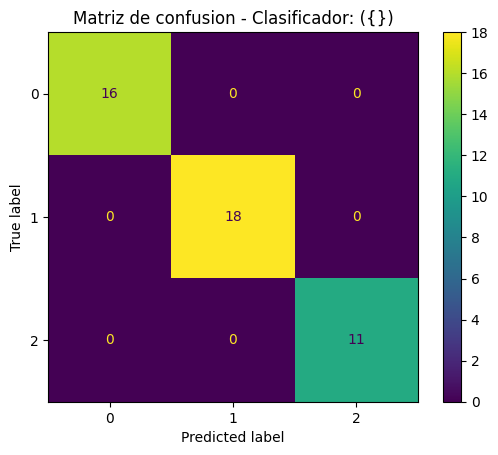

In [116]:
# Crear una instancia del clasificador Naive Bayes
clf = GaussianNB()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = clf.predict(X_test)

# Calcular y mostrar el reporte de clasificación
reporte = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(reporte)

# Calcular y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(matriz_confusion)
matriz_display.plot()
plt.title("Matriz de confusion - Clasificador: ({})")
plt.show()